**Prediksi Harga Rumah dengan Metode *Multiple Linear Regression***

# **Load Library**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **Load Dataset**

In [4]:
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

# **Sneak Peak Data**

In [5]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built.
#Dependent variabel(y) adalah price.
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [6]:
#Mengetahui jumlah kolom dan baris dari data.
#Data mempunyai 6 kolom (features) dengan 21613 baris.
df.shape

(21613, 6)

In [7]:
#Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [8]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [9]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['bathrooms'] = df['bathrooms'].astype('int')

#Mengganti nilai 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33,3)

# **Handling Missing Values**

In [10]:
#Mencari dan menangani missing values.
#Ternyata datanya sudah tidak ada missing values.
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


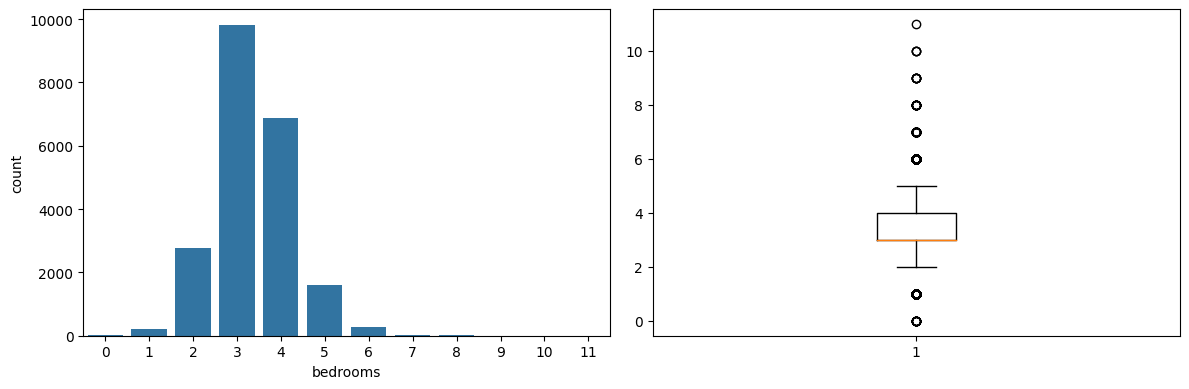

In [12]:
# Univariate analysis bedrooms.
# Membuat figure untuk plot
f = plt.figure(figsize=(12, 4))

# Menambahkan count plot untuk bedrooms
f.add_subplot(1, 2, 1)
sns.countplot(data=df, x='bedrooms')

# Menambahkan box plot untuk bedrooms
f.add_subplot(1, 2, 2)
plt.boxplot(data=df, x='bedrooms')

# Menampilkan plot
plt.tight_layout()
plt.show()

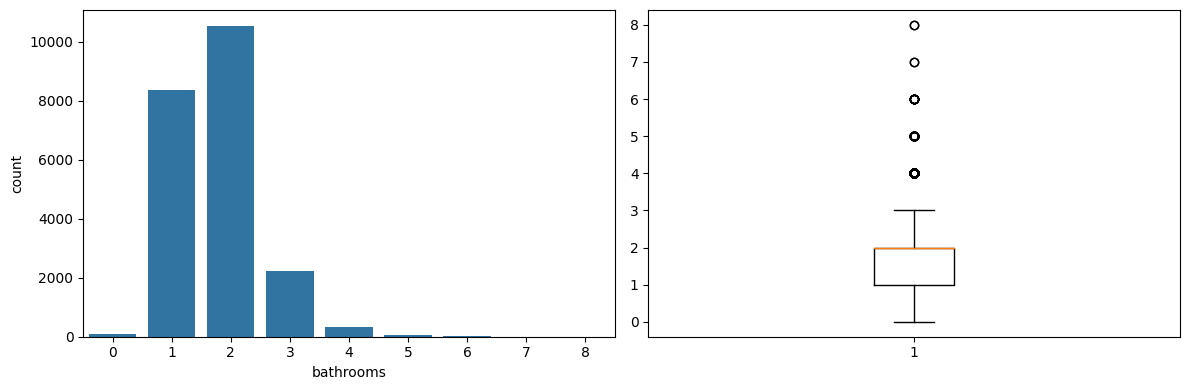

In [13]:
#Univariate analysis bathrooms.

# Membuat figure untuk plot
f = plt.figure(figsize=(12, 4))

# Menambahkan count plot untuk bathrooms
f.add_subplot(1, 2, 1)
sns.countplot(data=df, x='bathrooms')

# Menambahkan box plot untuk bathrooms
f.add_subplot(1, 2, 2)
plt.boxplot(data=df, x='bathrooms')

# Menampilkan plot
plt.tight_layout()
plt.show()

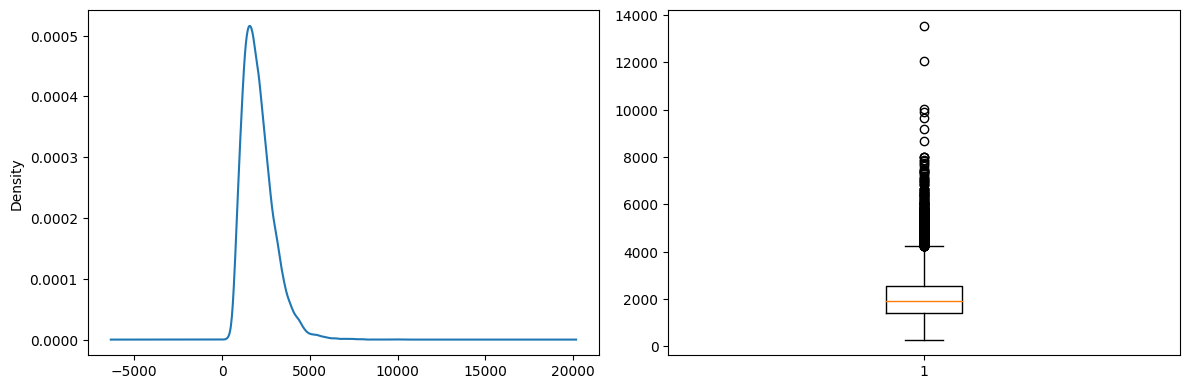

In [14]:
#Univariate analysis sqft_living.

# Membuat figure untuk plot
f = plt.figure(figsize=(12, 4))

# Menambahkan count plot untuk yr_built
f.add_subplot(1, 2, 1)
df['sqft_living'].plot(kind='kde')

# Menambahkan box plot untuk yr_built
f.add_subplot(1, 2, 2)
plt.boxplot(df['sqft_living'])

# Menampilkan plot
plt.tight_layout()
plt.show()

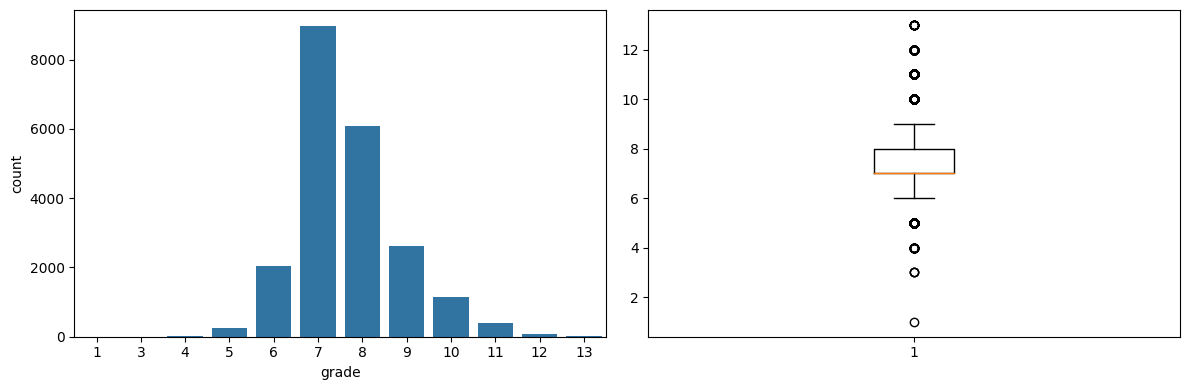

In [15]:
#Univariate analysis grade.

# Membuat figure untuk plot
f = plt.figure(figsize=(12, 4))

# Menambahkan count plot untuk grade
f.add_subplot(1, 2, 1)
sns.countplot(data=df, x='grade')

# Menambahkan box plot untuk grade
f.add_subplot(1, 2, 2)
plt.boxplot(data=df, x='grade')

# Menampilkan plot
plt.tight_layout()
plt.show()

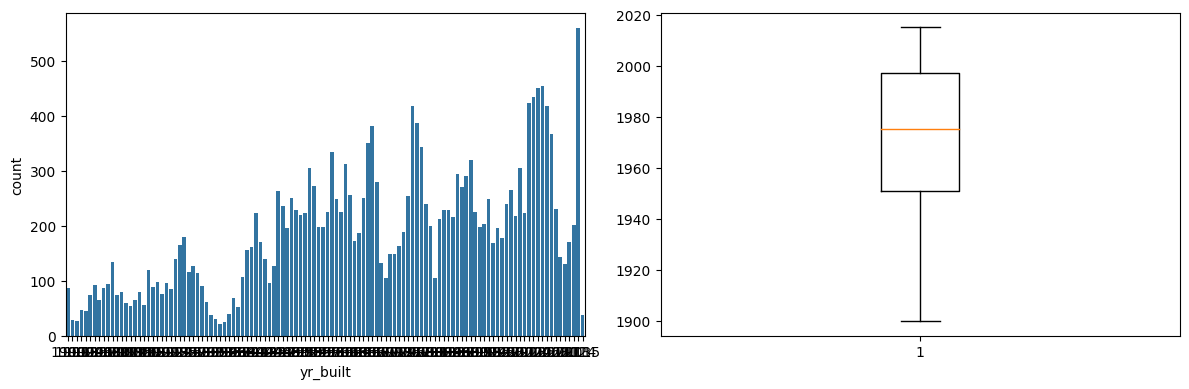

In [16]:
#Univariate analysis yr_built.

# Membuat figure untuk plot
f = plt.figure(figsize=(12, 4))

# Menambahkan count plot untuk yr_built
f.add_subplot(1, 2, 1)
sns.countplot(data=df, x='yr_built')

# Menambahkan box plot untuk yr_built
f.add_subplot(1, 2, 2)
plt.boxplot(data=df, x='yr_built')

# Menampilkan plot
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

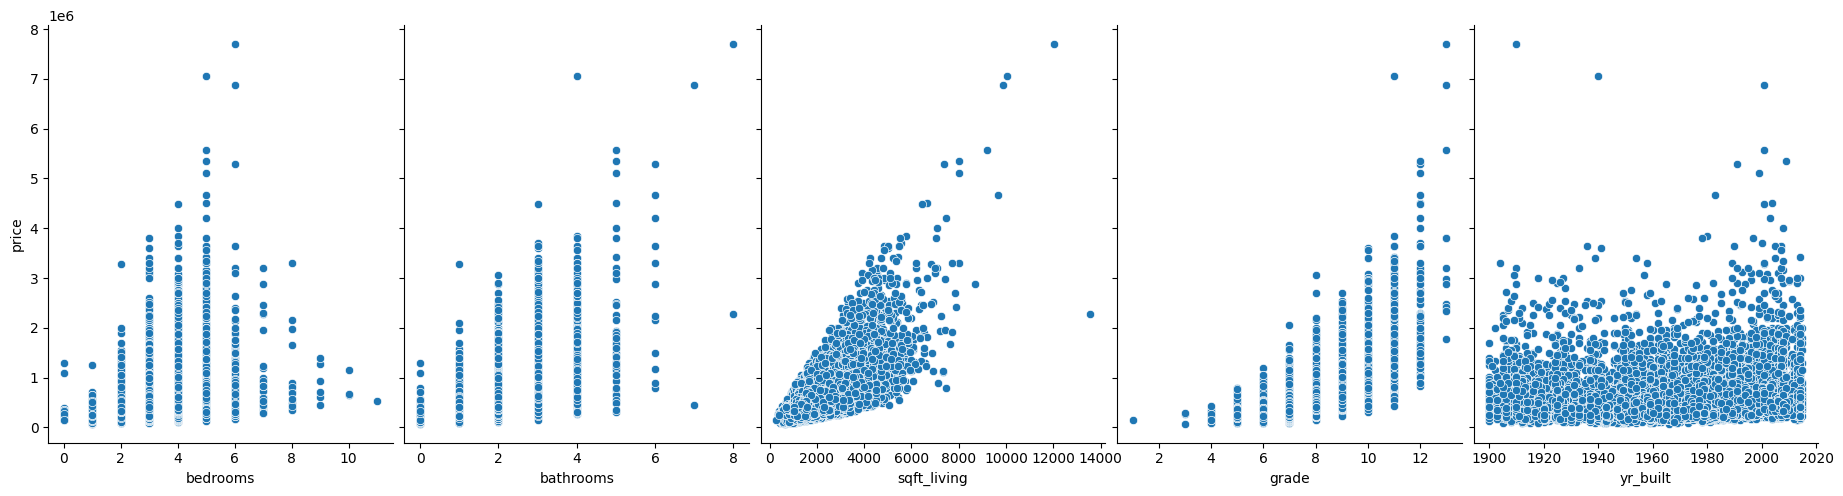

In [17]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'],
                      y_vars=['price'], height=5, aspect=0.75)

In [18]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
# df.corr().style.background_gradient().set_precision(2)=>harus update pandas, kalau mau update use:pip install --upgrade pandas
corr = df.corr()

# Menampilkan DataFrame korelasi
styled_corr = corr.style.background_gradient(cmap='coolwarm').format(precision=2)

# Menampilkan DataFrame yang sudah di-styling
styled_corr

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


# **Tahapan Modelling**

In [19]:
#Pertama, buat variabel x dan y.
x = df.drop(columns='price')
y = df['price']

#Kedua, split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Inisialisasi dan training model regresi linear
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Mendapatkan koefisien (slope) dari setiap fitur
coef_df = pd.DataFrame({'features': x_train.columns, 'coef_values': lin_reg.coef_})

# Menampilkan hasil koefisien dan intercept
intercept = lin_reg.intercept_
print(coef_df)

      features    coef_values
0     bedrooms  -53061.754643
1    bathrooms   64658.557906
2  sqft_living     188.909263
3        grade  131290.895368
4     yr_built   -3969.558315


In [20]:
#Keenam, cari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lin_reg.score(x_test, y_test)

0.61251132869411

Hasil akurasi sebesar 61.13%

**Prediksi Kriteria Rumah**

Jika ingin membeli rumah dengan kriteria sebagai berikut:
1. Jumlah bedrooms = 3
2. Jumlah bathrooms = 2
3. Luas rumahnya = 1800 sqft
4. Dengan grade 7
5. Tahun pembuatan rumahnya tahun 1990

In [21]:
#Prediksi harga rumah idaman.
# Inisialisasi dan training model regresi linear
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Data yang akan diprediksi, pastikan dalam bentuk DataFrame dengan nama kolom yang sesuai
# Masukkan kriteria rumah
new_data = pd.DataFrame([[3, 2, 1800, 7, 1990]], columns=x_train.columns)

# Prediksi nilai berdasarkan data baru
prediction = lin_reg.predict(new_data)

# Menampilkan hasil prediksi
print("Prediction:", prediction)

Prediction: [361351.99342265]


Harga rumah yang di idamkan adalah sekitar US$ 361.351

In [23]:
import pickle
pickle.dump(lin_reg, open('model_harga_rumah.pkl', 'wb'))